In [1]:
# Perfrom a binary classification: healthy/not healthy
# on breast cancer wisconsin data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve

In [2]:
# load in breast cancer data
data = pd.read_csv('../breast-cancer-wisconsin.data', names=['PatientId','ClumpThickness','UniformityCellSize','UniformityCellShape','MarginalAdhesion','SingleepithelialCellSize','BareNuclei','BlandChromatin','NormalNucleoli','Mitoses','Class'])

In [3]:
data.dtypes

PatientId                    int64
ClumpThickness               int64
UniformityCellSize           int64
UniformityCellShape          int64
MarginalAdhesion             int64
SingleepithelialCellSize     int64
BareNuclei                  object
BlandChromatin               int64
NormalNucleoli               int64
Mitoses                      int64
Class                        int64
dtype: object

In [4]:
# convert class to 1/0 insead of 2/4

# define conversion function
def convert_class(x):
    if x == 2:
        return 1
    if x == 4:
        return 0
        
# Convert class values
data['Class'] = np.array([convert_class(x) for x in data['Class']])

In [5]:
# Convert BareNuclei col to consider '?' as a NaN value

def convert_question_mark(x):
    if x == '?':
        return np.NaN
    else: return int(x)

data['BareNuclei'] = np.array([convert_question_mark(x) for x in data['BareNuclei']])

data = data.dropna(subset=['BareNuclei']);

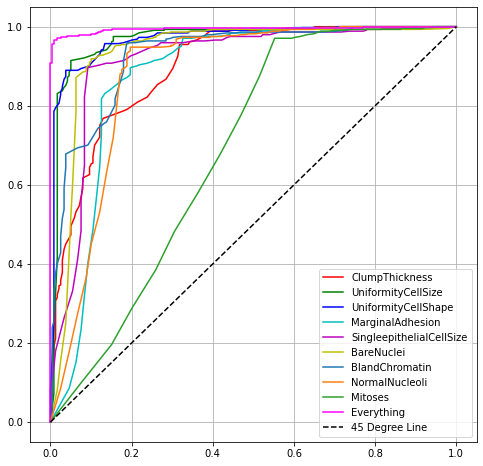

In [6]:
# create ROC curves for each column compared to class

# list of colors for roc graph
colors = [
    'r','g','b','c','m','y',
    'tab:blue','tab:orange','tab:green',
    'tab:red','tab:purple','tab:brown',
    'tab:pink','tab:gray','tab:olive',
    'tab:cyan','salmon','peru','palegreen',
    'magenta'
]

# get list of columns excluding patientID and class
cols_names = data.columns.values.astype(str)[1:-1]

# get target data
y_data = np.array(data['Class'])

# loop through column names and create roc curve for each
for idx, col in enumerate(cols_names):
    # collect x and y data
    x_data = np.array(data[col]).reshape(-1,1)
        
    # use cross validate instead of train/test for better results
    probabilities = cross_val_predict(
        LogisticRegression(),
        x_data,
        y_data,
        # use predict proba method to return probabilities instead of
        # predicted values
        method='predict_proba',
        # use cv = 10 to get good distribution of testing data
        cv=10
    )[:,1]
    
    # get roc curve values
    FPR, TPR, THRESHOLDS = roc_curve(y_data, probabilities)
    
    plt.plot(FPR, TPR, c=colors[idx], label=col)
    
# plot roc curve of regression for all features
x = np.array(data[cols_names])

probs = cross_val_predict(LogisticRegression(),
                         x,y_data, method='predict_proba', cv=10)[:,1]

fpr, tpr, thresholds = roc_curve(y_data, probs)

plt.plot(fpr, tpr, c=colors[-1], label='Everything')
    
# add 45 degree line
plt.plot([0,1],[0,1], c='k', ls='--', label='45 Degree Line')

# plot formatting
plt.gcf().set_size_inches(8,8)
plt.legend()
plt.grid()
plt.show()